# Genetic Algorithm Approach

Time series prediction with genetic algorithms

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from scipy import stats
from scipy import spatial
import time
from sklearn.metrics import mean_absolute_error
import random
import math
import time

In [ ]:
data = pd.read_csv('monthlyBeer.csv')


In [ ]:
data.columns = ['Month','beerProduction']

In [ ]:
data = data.bfill()

In [ ]:
beerProduction_mean= data.beerProduction.mean()
beerProduction_DiffMean = data.beerProduction.diff().mean()
beerProduction_Diff_Var = (np.var(data.beerProduction.diff()))**(1/2)
nDay = 60

In [ ]:
def reduce_data(dataFrame,Series,day_range):
    for i in range(dataFrame.shape[0]-day_range*4):
        values_mean = Series[dataFrame.shape[0]-day_range*2:dataFrame.shape[0]].values.mean()
        Series[i:i+nDay*2] = Series[i:i+nDay*2] + (values_mean-Series[i:i+nDay*2].mean())
        
    return dataFrame

In [ ]:
def createPopulation(adet,day_range,mean,diffmean):
    Population = []
    for i in range(adet):
        gen = []
        for j in range(day_range*2):
            gen.append(random.randint(int(mean-diffmean)-1,int(mean+diffmean)+1))
        Population.append(gen)
        
    return Population

In [ ]:
def train(dataFrame,Series,GenHavuzu,day_range):
    seçili_genler = []
    
    for i in range(dataFrame.shape[0]-day_range*2):
        values = Series[i:i+day_range*2].values
        min_mae = mean_absolute_error(GenHavuzu[0],values)
        for gen in GenHavuzu:
            mae = mean_absolute_error(gen,values)
            if mae < min_mae:
                min_mae = mae
                seçili_genler.append([GenHavuzu.index(gen),i])
                
                
    return seçili_genler

In [ ]:
for i in range(100):
    data_train = reduce_data(data,data.beerProduction,nDay)

In [ ]:
plt.plot(data_train.beerProduction,color = 'green')
plt.plot(data.beerProduction,color ='red')
plt.ylabel('simulation result of ratios')
plt.show()

In [ ]:
topList = []
value = 0
i = 0
j = 0
while( i <= len(seçili_Genler)):
    try:
        if seçili_Genler[j][1] == i:
            value = seçili_Genler[i][0]
            j += 1
        else:
            topList.append(value)
            print(value)
            i += 1
    except IndexError:
        break

In [ ]:
öncelikliListe, öncelikliListe_counts = np.unique(topList,return_counts=True)
modifiedGen = []

In [ ]:
def crossover(Series,day_range):
    global data
    global öncelikliListe
    global öncelikliListe_counts
    global genHavuzu
    global topList 
    global modifiedGen
    genHavuzu = np.array(genHavuzu)
    for i in range(data.shape[0]-day_range*4,data.shape[0]-day_range*2):
        öncelikliListe, öncelikliListe_counts = np.unique(topList,return_counts=True)
        values = Series[i:i+day_range*2].values
        run = True
        batch_threshold = 20
        batch = 0
        while(run):
            if batch >= batch_threshold:
                run = False
            genHavuzu_Selected = np.random.choice(öncelikliListe,4,p = öncelikliListe_counts/sum(öncelikliListe_counts))
            oldGen_1_15 = np.random.choice(genHavuzu[genHavuzu_Selected[0]-1],int(day_range/2))
            oldGen_2_15 = np.random.choice(genHavuzu[genHavuzu_Selected[1]-1],int(day_range/2))
            oldGen_3_15 = np.random.choice(genHavuzu[genHavuzu_Selected[2]-1],int(day_range/2))
            oldGen_4_15 = np.random.choice(genHavuzu[genHavuzu_Selected[3]-1],int(day_range/2))
            modifiedGen =  np.concatenate((oldGen_1_15, oldGen_2_15,oldGen_3_15,oldGen_4_15),axis =None)
            target = mean_absolute_error(modifiedGen,values)
            val_1 = genHavuzu[genHavuzu_Selected[0]-1]
            val_2 = genHavuzu[genHavuzu_Selected[1]-1]
            val_3 = genHavuzu[genHavuzu_Selected[2]-1]
            val_4 = genHavuzu[genHavuzu_Selected[3]-1]
            thr_1 = mean_absolute_error(val_1,values)
            thr_2 = mean_absolute_error(val_2,values)
            thr_3 = mean_absolute_error(val_3,values)
            thr_4 = mean_absolute_error(val_4,values)
            if  target < thr_1 and target < thr_2 and target < thr_3 and target < thr_4:
                print("Completed")
                genHavuzu = np.vstack((genHavuzu, modifiedGen))
                topList.append(len(genHavuzu))
                batch += 1

In [ ]:
crossover(data.beerProduction,nDay)

In [ ]:
öncelikliListe, öncelikliListe_counts = np.unique(topList,return_counts=True)
modifiedGen = []

In [ ]:
def mutation_gen(gen,Series):
    x = np.random.choice(gen,10)
    for i in range(len(gen)):
        if gen[i] in x:
            gen[i] = np.random.choice(Series.values)
            
            
    return gen

In [ ]:
def modification(Series,day_range):
    global data
    global öncelikliListe
    global öncelikliListe_counts
    global genHavuzu
    global topList 
    global modifiedGen
    mutated_kromozom = np.zeros(day_range*2)
    nonMutated_kromozom = np.zeros(day_range*2)
    genHavuzu = np.array(genHavuzu)
    for i in range(data.shape[0]-day_range*4,data.shape[0]-day_range*2):
        öncelikliListe, öncelikliListe_counts = np.unique(topList,return_counts=True)
        values = Series[i:i+day_range*2].values
        run = True
        batch_threshold = 100
        batch = 0
        while(run):
            if batch >= batch_threshold:
                run = False
            genHavuzu_Selected = np.random.choice(öncelikliListe,1,p = öncelikliListe_counts/sum(öncelikliListe_counts))
            mutated_kromozom = mutation_gen(list(genHavuzu[genHavuzu_Selected[0]-1]),Series)
            nonMutated_kromozom = genHavuzu[genHavuzu_Selected[0]-1]
            thr_1 = mean_absolute_error(mutated_kromozom,values)
            org_1 = mean_absolute_error(nonMutated_kromozom,values)
            batch += 1
            if  thr_1 < org_1:
                print("Completed")
                genHavuzu = np.vstack((genHavuzu[:,0], mutated_kromozom))
                topList.append(len(genHavuzu))

In [ ]:
modification(data.beerProduction,nDay)

In [ ]:
seçilmişGenler = genHavuzu[2000:len(genHavuzu)]
#seçilmişGenler means selected gens

In [ ]:
def select_the_max(Series,day_range):
    global seçilmişGenler
    seçilmişGenler = list(seçilmişGenler)
    min_mae = mean_absolute_error(seçilmişGenler[0][0:day_range],Series[data.shape[0]-day_range:data.shape[0]])
    lastGen = []
    for gen in seçilmişGenler:
        if mean_absolute_error(gen[0:day_range],Series[data.shape[0]-day_range:data.shape[0]]) < min_mae:
            min_mae = mean_absolute_error(gen[0:day_range],Series[data.shape[0]-day_range:data.shape[0]])
            lastGen = gen
    return lastGen,min_mae

In [ ]:
sonGen,Hata = select_the_max(data.beerProduction,nDay)

In [ ]:
def sonDegerModifikasyon(Series,day_range):
    global sonGen
    Last_gen = np.zeros(day_range)
    for i in range(100000):
        mutated_kromozom = mutation_gen(list(sonGen),Series)
        target = Series[data.shape[0]-day_range:data.shape[0]]
        val_1 = sonGen[0:day_range]
        org_1 = mean_absolute_error(val_1,target)
        thr_1 = mean_absolute_error(mutated_kromozom[0:day_range],target)
        if  thr_1 < org_1:
            if (mean_absolute_error(mutated_kromozom[0:day_range],target)) < (mean_absolute_error(Last_gen[0:day_range],target)):
                Last_gen = mutated_kromozom
                print("Completed")
            
            
    return Last_gen

In [ ]:
Son_elenmiş_gen = sonDegerModifikasyon(data.beerProduction,nDay)

In [ ]:
plt.plot(Son_elenmiş_gen,color = 'green')
plt.plot(data['beerProduction'].values[data.shape[0]-nDay:data.shape[0]],color ='red')
plt.ylabel('simulation result of ratios')
plt.show()

In [ ]:
target = data.beerProduction[data.shape[0]-nDay:data.shape[0]]
val_1 = Son_elenmiş_gen[0:nDay]
org_1 = mean_absolute_error(val_1,target)
org_1
12.7552167839006

# SORTING ALGORITHM CUSTOM APPROACH


In [ ]:
def diffMaxSortingAlgo(array):
  MaxNum = max(array)
  MinNum = min(array)

  allNumbers = [0 for i in range(2*(abs(MaxNum)+abs(MinNum)))]
  for i in range(len(array)):
    allNumbers[abs(MaxNum-array[i])] = array[i]
  allNumbers = [i for i in allNumbers if i != 0]
  return allNumbers

def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left_half = arr[:mid]
        right_half = arr[mid:]

        merge_sort(left_half)
        merge_sort(right_half)

        i = j = k = 0

        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1

        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1

        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1

In [ ]:
def diffMaxSortingAlgo(array, typeSort="integer"):
    MaxNum = max(array)
    MinNum = min(array)
    
    multiplier = 1

    if typeSort != "integer":
        multiplier = 10**len(str(int(abs(MinNum))))
        array = [i * multiplier for i in array]

    allNumbers = [0 for _ in range(int(2 * (abs(MaxNum * multiplier) + abs(MinNum * multiplier))))]

    for i in range(len(array)):
        if typeSort != "integer":
            index = int(abs(MaxNum * multiplier - array[i]))
        else:
            index = int(abs(MaxNum - array[i]))

        if typeSort != "integer":
          rational_num = array[i]/multiplier
          allNumbers[index] = rational_num
        else:
          allNumbers[index] = array[i]

    allNumbers = [i for i in allNumbers if i != 0]
    return allNumbers

In [ ]:
def diffMaxSortingAlgo(array, typeSort="integer"):
    MaxNum = max(array)
    MinNum = min(array)
    
    multiplier = 1

    if typeSort != "integer":
        multiplier = 10**len(str(int(abs(MinNum))))
        array = [i * multiplier for i in array]

    allNumbers = [0 for _ in range(int(2 * (abs(MaxNum * multiplier) + abs(MinNum * multiplier))))]

    for i in range(len(array)):
        if typeSort != "integer":
            index = int(abs(MaxNum * multiplier - array[i]))
        else:
            index = int(abs(MaxNum - array[i]))

        if typeSort != "integer":
          rational_num = array[i]/multiplier
          allNumbers[index] = rational_num
        else:
          allNumbers[index] = array[i]

    allNumbers = [i for i in allNumbers if i != 0]
    return allNumbers


def counting_sort(arr):
    if not arr:
        return arr

    # Find the maximum and minimum values in the array
    max_value = max(arr)
    min_value = min(arr)

    # Calculate the range of values
    value_range = max_value - min_value + 1

    # Initialize the count array and the result array
    count_array = [0] * value_range
    result_array = [0] * len(arr)

    # Count the occurrences of each element
    for num in arr:
        count_array[num - min_value] += 1

    # Calculate the cumulative count array
    for i in range(1, len(count_array)):
        count_array[i] += count_array[i - 1]

    # Build the result array
    for num in reversed(arr):
        result_array[count_array[num - min_value] - 1] = num
        count_array[num - min_value] -= 1

    return result_array

In [ ]:
mergeSortTime = []
diffMaxSortingAlgoTime = []
countingSortTime = []
for i in range(1,100):
  listOfNumbers = [random.randint(-1000,1000) for i in range(100*i)]

  start_time = time.time()
  sorted_data = diffMaxSortingAlgo(listOfNumbers,typeSort="integer")
  diffMaxSortingAlgoTime.append(time.time() - start_time)

  start_time = time.time()
  sorted_data = counting_sort(listOfNumbers)
  countingSortTime.append(time.time() - start_time)

# String Distance

In [ ]:
def string_distance(string_1,string_2):
  distances = []
  for i in range(len(string_1)):
    selected_string = string_1[i::]
    distance = abs(len(selected_string)-len(string_2)) + i
    for let1,let2 in zip(selected_string,string_2):
      if let1 != let2:
        distance += 1

    distances.append(distance)
  return min(distances)

In [ ]:
def levenshtein_distance(str1, str2):
    len_str1 = len(str1) + 1
    len_str2 = len(str2) + 1

    # Create a 2D matrix to store distances
    matrix = [[0] * len_str2 for _ in range(len_str1)]

    # Initialize the matrix
    for i in range(len_str1):
        matrix[i][0] = i
    for j in range(len_str2):
        matrix[0][j] = j

    # Populate the matrix with minimum distances
    for i in range(1, len_str1):
        for j in range(1, len_str2):
            cost = 0 if str1[i - 1] == str2[j - 1] else 1
            matrix[i][j] = min(
                matrix[i - 1][j] + 1,       # Deletion
                matrix[i][j - 1] + 1,       # Insertion
                matrix[i - 1][j - 1] + cost  # Substitution
            )

    # The bottom-right cell contains the Levenshtein distance
    return matrix[-1][-1]

In [ ]:
print(string_distance("kitten","sitting"),levenshtein_distance("kitten","sitting"))
print(string_distance("flaw","lawn"),levenshtein_distance("flaw","lawn"))
print(string_distance("intention","execution"),levenshtein_distance("intention","execution"))
print(string_distance("hola","hello"),levenshtein_distance("hola","hello"))
print(string_distance("book","back"),levenshtein_distance("book","back"))

In [ ]:
def string_distance(string_1,string_2):
  distances = []
  for i in range(len(string_1)):
    selected_string = string_1[i::]
    distance = abs(len(selected_string)-len(string_2)) + i
    for let1,let2 in zip(selected_string,string_2):
      if let1 != let2:
        distance += 1

    distances.append(distance)
  if len(distances) > 0:
    return min(distances)
  else:
    return abs(len(string_1)-len(string_2))

In [ ]:
import time

levinsteinDistanceVal = []
customFuncVal = []
for i in range(1,100):
  
  a = create_random_string(i)
  b = create_random_string(i)

  start_time = time.time()
  resultFactors = levenshtein_distance(a,b)
  levinsteinDistanceVal.append(time.time() - start_time)

  start_time = time.time()
  resultFactors = string_distance(a,b)
  customFuncVal.append(time.time() - start_time)

In [ ]:

def string_distance(string_1,string_2):
  distances = []
  for i in range(len(string_1)):
    selected_string = string_1[i::]
    distance = abs(len(selected_string)-len(string_2)) + i
    for let1,let2 in zip(selected_string,string_2):
      if let1 != let2:
        distance += 1

    distances.append(distance)
  if len(distances) > 0:
    return min(distances)
  else:
    return abs(len(string_1)-len(string_2))

# N_Queen Genetic Algo Approach

In [ ]:
import numpy as np
import random
import time

def n_queens_genetic_algorithm(n_queens, sol_number):
    Population = []

    def fitnessFunction(array):
        score = 0
        for x, y in enumerate(array):
            for x2 in range(x + 1, len(array)):
                if abs((x - x2)) == abs(y - array[x2]) or y == array[x2]:
                    score -= 10
        return score

    def Mutate(gen):
        for i, el in enumerate(gen):
            for j in range(i + 1, len(gen)):
                if abs((i - j)) == abs(el - gen[j]) or el == gen[j]:
                    gen[j] = random.randint(1, n_queens)

    scores = []
    zero_count = 0
    count_First = []
    for i in range(100000):
        gen = [random.randint(1, n_queens) for _ in range(n_queens)]
        Population.append(gen)
        scoreFintess = fitnessFunction(gen)
        scores.append(scoreFintess)
        sorted_data = sorted(zip(scores, Population), reverse=True)

        Population = [x for _, x in sorted_data][:300]
        scores = sorted(scores, reverse=True)[:300]
        scores_repeat = scores[:]
        countFirstNum = scores[0]
        count_First.append(countFirstNum)

        countZero = scores.count(0)
        if countZero >= sol_number:
            return np.unique(np.array(Population[:countZero]), axis=0)
            break
            
        for _ in range(10):
            try:
                index = random.randint(0, 99)
                Mutate(Population[index])
                scores[index] = fitnessFunction(Population[index])
            except IndexError:
                continue
        if abs(count_First.count(max(count_First))) * len(scores) > abs(sum(scores)) / n_queens:
          count_First = []
          replace = random.randint(0, 300)
          start_idx = replace 
          end_idx = (replace * 2) % len(Population) 

          # Replace a segment of Population and scores
          replacement_segment = Population[replace:(replace*2) % len(Population)]
          Population[start_idx:end_idx] = replacement_segment
          scores[start_idx:end_idx] = [np.average(scores) for _ in range(end_idx - start_idx)]

start_time = time.time()
result = n_queens_genetic_algorithm(30, 2)
end_time = time.time()
print(f"Execution Time: {end_time - start_time} seconds")
print(result)

In [ ]:
countFirstNum = scores[0]
count_First.append(countFirstNum)
if abs(count_First.count(max(count_First))) * len(scores) > abs(sum(scores)) / n_queens:
          count_First = []
          replace = random.randint(0, 300)
          start_idx = replace 
          end_idx = (replace * 2) % len(Population) 

          # Replace a segment of Population and scores
          replacement_segment = Population[replace:(replace*2) % len(Population)]
          Population[start_idx:end_idx] = replacement_segment
          scores[start_idx:end_idx] = [np.average(scores) for _ in range(end_idx - start_idx)]

In [ ]:
import numpy as np
import random

class NQueensSolver:
    def __init__(self, n):
        self.n = n
        self.total_number = (n * n) ** 2
        self.board = np.zeros((n, n), dtype=int)
        self.choosen_list = []
        self.dump = set()
        self.count = 0
        self.false_count = 0
        self.choosen_queen_x = 0
        self.choosen_queen_y = 0
        self.search_complete = False
        self.developed_board = []

    def create_board(self):
        self.board = np.zeros((self.n, self.n), dtype=int)

    def check_number(self, x, y):
        total_number = 0
        total_number += self.n + self.n - 1
        total_number += self.n - abs(x - y) + self.n * 2 - (x + y)
        return total_number

    def check_correct(self, x, y):
        return self.board[x][y] == 0

    def shape_board(self):
        for k in range(self.n):
            for l in range(self.n):
                if [self.choosen_queen_x, self.choosen_queen_y] != [k, l] and self.board[k][l] != 1:
                    if abs(self.choosen_queen_x - k) == abs(self.choosen_queen_y - l) or \
                       self.choosen_queen_x == k or self.choosen_queen_y == l:
                        self.board[k][l] = 2

    def check_result(self):
        for i, j in self.choosen_list:
            for k in range(self.n):
                for l in range(self.n):
                    if [i, j] != [k, l]:
                        if abs(i - k) == abs(j - l) or i == k or j == l:
                            self.board[k][l] = 2
        print(self.board, "board print")

    def choose_queen(self):
        if not self.choosen_list:
            self.choosen_queen_x = random.randint(0, self.n - 1)
            self.choosen_queen_y = random.randint(0, self.n - 1)
            self.choosen_list.append([self.choosen_queen_x, self.choosen_queen_y])
            self.board[self.choosen_queen_x][self.choosen_queen_y] = 1
            self.check_result()
            print(self.board)
            print(self.choosen_queen_x, self.choosen_queen_y, self.total_number)

        for i in range(self.n):
            for j in range(self.n):
                if self.check_correct(i, j):
                    self.choosen_queen_x = i
                    self.choosen_queen_y = j
                    self.board[i][j] = 1
                    self.choosen_list.append([i, j])
                    self.shape_board()

        if self.check_correct(self.choosen_queen_x, self.choosen_queen_y):
            if [self.choosen_queen_x, self.choosen_queen_y] not in self.choosen_list:
                self.choosen_list.append([self.choosen_queen_x, self.choosen_queen_y])
                deleted_number = self.check_number(self.choosen_queen_x, self.choosen_queen_y)
                self.total_number -= deleted_number
                print(self.choosen_queen_x, self.choosen_queen_y, self.total_number)
        else:
            if (self.choosen_queen_x, self.choosen_queen_y) in self.dump:
                self.count += 1
            else:
                self.dump.add((self.choosen_queen_x, self.choosen_queen_y))

            self.false_count += 1

    def check_final_matrix(self):
        board_current = np.zeros((self.n, self.n), dtype=int)
        for element in self.choosen_list:
            board_current[element[0]][element[1]] = 1

        developed_board_state = bool(self.developed_board)

        for element in self.choosen_list:
            if developed_board_state:
                for k in range(self.n):
                    for l in range(self.n):
                        if [element[0], element[1]] != [k, l]:
                            if abs(element[0] - k) == abs(element[1] - l) or element[0] == k or element[1] == l:
                                self.developed_board[k][l] = 2
            else:
                for k in range(self.n):
                    for l in range(self.n):
                        if [element[0], element[1]] != [k, l]:
                            if abs(element[0] - k) == abs(element[1] - l) or element[0] == k or element[1] == l:
                                board_current[k][l] = 2

        print(board_current)
        self.developed_board = board_current
        return np.count_nonzero(board_current) == self.n * self.n

    def solve_n_queens(self):
        while self.total_number > 0:
            self.choose_queen()
            if self.check_final_matrix():
                print(len(self.choosen_list))
                break

            for i, j in self.choosen_list:
                self.board[i][j] = 1

# Example usage:
solver = NQueensSolver(2000)
solver.solve_n_queens()

In [ ]:
def is_safe(board, row, col, n):
    # Check if there is a queen in the same column
    for i in range(row):
        if board[i] == col or \
           board[i] - i == col - row or \
           board[i] + i == col + row:
            return False
    return True

def solve_n_queens_util(board, row, n, solutions, num_solutions):
    if len(solutions) == num_solutions:
        return

    if row == n:
        solutions.append(board.copy())
    else:
        for col in range(n):
            if is_safe(board, row, col, n):
                board[row] = col
                solve_n_queens_util(board, row + 1, n, solutions, num_solutions)

def get_n_queens_solutions(n, num_solutions):
    board = [-1] * n
    solutions = []
    solve_n_queens_util(board, 0, n, solutions, num_solutions)
    return solutions

def print_solutions(solutions):
    for solution in solutions:
        for row in solution:
            line = ['Q' if i == row else '.' for i in range(len(solution))]
            print(" ".join(line))
        print("\n")

# Example usage for getting 2 solutions for the 8-queens problem
n = 8
num_solutions = 2
solutions = get_n_queens_solutions(n, num_solutions)
print_solutions(solutions)

In [ ]:
import time
import matplotlib.pyplot as plt
# Loop through different values of n
n_values = list(range(4, 30))  # You can adjust the range based on your needs
get_n_queens_times = []
ga_times = []

for n in n_values:
    # Measure execution time for get_n_queens_solutions
    start_time = time.time()
    get_n_queens_solutions(n,1)
    end_time = time.time()
    get_n_queens_times.append(end_time - start_time)

    # Measure execution time for n_queens_genetic_algorithm
    start_time = time.time()
    n_queens_genetic_algorithm(n,1)
    end_time = time.time()
    ga_times.append(end_time - start_time)

# Plot the results
plt.plot(n_values, get_n_queens_times, label='get_n_queens_solutions')
plt.plot(n_values, ga_times, label='n_queens_genetic_algorithm')
plt.xlabel('Number of Queens (n)')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.show()

In [ ]:
def solveNQueens(n, num_solutions=1):
    def could_place(row, col):
        for i in range(row):
            if board[i] == col or \
                board[i] - i == col - row or \
                board[i] + i == col + row:
                return False
        return True

    def place_queens(n, row):
        if len(result) >= num_solutions:
          return
        if row == n:
            result.append(board[:])
            return
        for col in range(n):
            if could_place(row, col):
                board[row] = col
                place_queens(n, row + 1)
                board[row] = 0

    result = []
    board = [0] * n
    while len(result) < num_solutions:  # Use < instead of <=
        place_queens(n, 0)
    # Return the specified number of solutions
    return [["." * i + "Q" + "." * (n - i - 1) for i in sol] for sol in result[:num_solutions]]

# Example usage for 1 solution
n = 8
num_solutions = 1
solutions = solveNQueens(n, num_solutions)
for idx, sol in enumerate(solutions):
    print(f"Solution {idx + 1}:")
    for row in sol:
        print(row)

In [ ]:
import time
import matplotlib.pyplot as plt
# Loop through different values of n
n_values = list(range(4, 30))  # You can adjust the range based on your needs
solveNQueens_times = []
ga_times = []

for n in n_values:
    # Measure execution time for get_n_queens_solutions
    start_time = time.time()
    solveNQueens(n,3)
    end_time = time.time()
    solveNQueens_times.append(end_time - start_time)

    # Measure execution time for n_queens_genetic_algorithm
    start_time = time.time()
    n_queens_genetic_algorithm(n,3)
    end_time = time.time()
    ga_times.append(end_time - start_time)

# Plot the results
plt.plot(n_values, solveNQueens_times, label='solveNQueens_times solutions')
plt.plot(n_values, ga_times, label='n_queens_genetic_algorithm')
plt.xlabel('Number of Queens (n)')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.show()

## Last Version of Algorithm

In [ ]:
import numpy as np
import random
import time

def n_queens_genetic_algorithm(n_queens, sol_number):
    Population = []

    def fitnessFunction(array):
        score = 0
        for x, y in enumerate(array):
            for x2 in range(x + 1, len(array)):
              a = abs((x - x2)) == abs(y - array[x2])
              b = y == array[x2]
              if a or b:
                if a:
                  score -= abs(x-x2) * 10
                if b:
                  score -= abs(y-x2) * 10
        return score

    def Mutate(gen):
        for i, el in enumerate(gen):
            for j in range(i + 1, len(gen)):
                if abs((i - j)) == abs(el - gen[j]) or el == gen[j]:
                    gen[j] = random.randint(1, n_queens)

    scores = []
    zero_count = 0
    count_First = []
    x = (n_queens + n_queens)
    for i in range(10**10):
        gen = [random.randint(1, n_queens) for _ in range(n_queens)]
        Population.append(gen)
        scoreFintess = fitnessFunction(gen)
        scores.append(scoreFintess)
        sorted_data = sorted(zip(scores, Population), reverse=True)

        Population = [x for _, x in sorted_data][:x]
        scores = sorted(scores, reverse=True)[:x]
        scores_repeat = scores[:]
        countFirstNum = scores[0]
        count_First.append(countFirstNum)

        countZero = scores.count(0)
        if countZero >= sol_number:
            return np.unique(np.array(Population[:countZero]), axis=0)
            break

        for _ in range(10+n_queens):
            try:
                index = random.randint(0, x)
                Mutate(Population[index])
                scores[index] = fitnessFunction(Population[index])
            except IndexError:
                continue
        if abs(count_First.count(max(count_First))) * len(scores) > abs(sum(scores)) / (n_queens):
          possibility = 0.95
          possibility -= 1/(sum([k for k in range(i)]) + 100)
          if possibility < 0.35: 
            count_First = []
            replace = random.randint(0, x)
            start_idx = replace 
            end_idx = (replace * 2) % len(Population) 
            x += x

            # Replace a segment of Population and scores
            replacement_segment = Population[replace:(replace*2) % len(Population)]
            Population[start_idx:end_idx] = replacement_segment
            scores[start_idx:end_idx] = [np.average(scores) for _ in range(end_idx - start_idx)]
          else:
            count_First = []
            Population = []
            scores = []
            x += x

In [ ]:
import numpy as np
import random
import time

def generate_non_matching_values(n):
    # Generate a list of unique values from 1 to n
    unique_values = list(range(0, n))

    # Shuffle the list to get a random order
    random.shuffle(unique_values)

    return unique_values


def n_queens_genetic_algorithm(n_queens, sol_number):
    Population = []

    def fitnessFunction(array):
        score = 0
        for x, y in enumerate(array):
            for x2 in range(x + 1, len(array)):
              a = abs((x - x2)) == abs(y - array[x2])
              b = y == array[x2]
              if a or b:
                if a:
                  score -= abs(x-x2) * 10
                if b:
                  score -= abs(y-x2) * 10
        return score

    def Mutate(gen):
        for i, el in enumerate(gen):
            for j in range(i + 1, len(gen)):
                if abs((i - j)) == abs(el - gen[j]) or el == gen[j]:
                  gen[j] = int(random.randint(0,n_queens))

    scores = []
    zero_count = 0
    count_First = []
    x = (n_queens + n_queens)
    for i in range(10**10):
        gen = generate_non_matching_values(n_queens)
        Population.append(gen)
        scoreFintess = fitnessFunction(gen)
        scores.append(scoreFintess)
        sorted_data = sorted(zip(scores, Population), reverse=True)

        Population = [x for _, x in sorted_data][:x]
        scores = sorted(scores, reverse=True)[:x]
        scores_repeat = scores[:]
        countFirstNum = scores[0]
        count_First.append(countFirstNum)

        countZero = scores.count(0)
        if countZero >= sol_number:
            return np.unique(np.array(Population[:countZero]), axis=0)
            break

        for _ in range(10+n_queens):
            try:
                index = random.randint(0, x)
                Mutate(Population[index])
                scores[index] = fitnessFunction(Population[index])
            except IndexError:
                continue
        if abs(count_First.count(max(count_First))) * len(scores) > abs(sum(scores)) / (n_queens):
          possibility = 0.95
          possibility -= 1/(sum([k for k in range(i)]) + 100)
          if possibility < 0.35: 
            count_First = []
            replace = random.randint(0, x)
            start_idx = replace 
            end_idx = (replace * 2) % len(Population) 
            x += x

            # Replace a segment of Population and scores
            replacement_segment = Population[replace:(replace*2) % len(Population)]
            Population[start_idx:end_idx] = replacement_segment
            scores[start_idx:end_idx] = [np.average(scores) for _ in range(end_idx - start_idx)]
          else:
            count_First = []
            Population = []
            scores = []
            x += x

In [ ]:
import numpy as np
import random
import time

def generate_non_matching_values(n):
    # Generate a list of unique values from 1 to n
    unique_values = list(range(0, n))

    # Shuffle the list to get a random order
    random.shuffle(unique_values)

    return unique_values


def n_queens_genetic_algorithm(n_queens, sol_number):
    Population = []

    def fitnessFunction(array):
        score = 0
        for x, y in enumerate(array):
            for x2 in range(x + 1, len(array)):
              a = abs((x - x2)) == abs(y - array[x2])
              b = y == array[x2]
              if a or b:
                if a:
                  score -= abs(x-x2) * 10
                if b:
                  score -= abs(y-x2) * 10
        return score

    def Mutate(gen):
        for i, el in enumerate(gen):
            for j in range(i + 1, len(gen)):
                if abs((i - j)) == abs(el - gen[j]) or el == gen[j]:
                  gen[j] = int(random.randint(0,n_queens))

    scores = []
    zero_count = 0
    count_First = []
    x = (n_queens + n_queens)
    for i in range(10**10):
        gen = generate_non_matching_values(n_queens)
        Population.append(gen)
        scoreFintess = fitnessFunction(gen)
        scores.append(scoreFintess)
        sorted_data = sorted(zip(scores, Population), reverse=True)

        Population = [x for _, x in sorted_data][:x]
        scores = sorted(scores, reverse=True)[:x]
        scores_repeat = scores[:]
        countFirstNum = scores[0]
        count_First.append(countFirstNum)

        countZero = scores.count(0)
        if countZero >= sol_number:
            return np.unique(np.array(Population[:countZero]), axis=0)
            break

        for _ in range(10+n_queens):
            try:
                index = random.randint(0, x)
                Mutate(Population[index])
                scores[index] = fitnessFunction(Population[index])
            except IndexError:
                continue
        if abs(count_First.count(max(count_First))) * len(scores) > abs(sum(scores)) / (n_queens):
          possibility = 0.95
          possibility -= 1/(sum([k for k in range(i)]) + 100)
          if possibility < 0.35: 
            count_First = []
            replace = random.randint(0, x)
            start_idx = replace 
            end_idx = (replace * 2) % len(Population) 
            x += x

            # Replace a segment of Population and scores
            replacement_segment = Population[replace:(replace*2) % len(Population)]
            Population[start_idx:end_idx] = replacement_segment
            scores[start_idx:end_idx] = [np.average(scores) for _ in range(end_idx - start_idx)]
          else:
            count_First = []
            Population = []
            scores = []
            x += x


# Knapsack Problem

In [165]:
def knapsack_01(a, b):
    n = len(a)
    dp = [[False] * (b + 1) for _ in range(n + 1)]

    # Base case: no items can sum to 0
    for i in range(n + 1):
        dp[i][0] = True

    for i in range(1, n + 1):
        for j in range(1, b + 1):
            # If the current item's weight is less than or equal to the remaining capacity
            if a[i - 1] <= j:
                # Check whether including or excluding the item results in a valid sum
                dp[i][j] = dp[i - 1][j] or dp[i - 1][j - a[i - 1]]
            else:
                # If the current item is too heavy, exclude it
                dp[i][j] = dp[i - 1][j]

    return dp[n][b]

# Example usage:
array = [random.randint(1, 10) for i in range(30)]
indexes = list(np.unique([random.randint(0, len(array)-1) for i in range(random.randint(2, len(array)-1))]))
print("Original Array:", array)
limit = sum([array[index] for index in indexes])
print("Selected Indices:", indexes)
print("Limit:", limit)
result = knapsack_01(array, limit)
print(result)

Original Array: [2, 1, 9, 10, 6, 7, 10, 7, 8, 1, 5, 1, 7, 10, 8, 6, 7, 5, 5, 10, 5, 10, 8, 2, 2, 4, 9, 3, 9, 6]
Selected Indices: [1, 2, 6, 7, 13, 17, 19, 21, 22, 23, 24, 26, 27, 29]
Limit: 92
True


In [346]:
import random
import math

all_combo = []

def combinations_of_sums_recursive(array, length, limit, current_index=0, current_combination=[], result=[]):
    # If the current combination has reached the desired length
    if len(current_combination) == length:
        current_sum = sum(current_combination)
        result.append(current_sum)
        all_combo.append(current_combination)
        if current_sum == limit:
            return current_combination

    # Iterate over the remaining elements in the array
    for i in range(current_index, len(array)):
        # Recursively generate combinations
        found = combinations_of_sums_recursive(array, length, limit, i + 1, current_combination + [array[i]], result)
        if found:
            return found

        if len(result) > math.comb(len(array), length):
            return False


    return None

# Example usage:
array = [2,3,4,10,2,1,20,13]
sorted_array = sorted(array)
indexes = list(np.unique([random.randint(0, len(array)-1) for i in range(random.randint(2, len(array)-1))]))
comb_num = len(indexes)
limit = sum([sorted_array[index] for index in indexes])
result = combinations_of_sums_recursive(array, comb_num, limit)
print(result)


[2, 4, 10, 20]


In [473]:
import random
import numpy as np


def knapsack_custom(array, limit):
    sorted_array = sorted(array)

    for i in range(1,len(array)+1):
        min_sum = sum(sorted_array[0:i])
        max_sum = sum(sorted_array[len(array)-i::])

        min_number = sorted_array[0]

        if limit < min_number or limit > sum(sorted_array):
            return False

        
        if limit == min_sum or limit == max_sum:
            return True

        if limit > min_sum and limit < max_sum:
            min_index = 0
            max_index = len(array)
            while limit > min_sum and min_index < max_index:
                min_index += 1
                max_index = min_index + i 
                min_sum = sum(sorted_array[min_index:max_index])

            while limit < max_sum and max_index-min_index > i:
                max_index -= 1 
                min_index = max_index - i 
                max_sum = sum(sorted_array[max_index:-1])

                if min_index < 0:
                    min_index = 0
            
   
            result = combinations_of_sums_recursive(sorted_array[min_index:max_index], i, limit)
            if not result:
                continue

            if sum(result) == limit:
                return True

    return False

# Example usage:
array = [1,2,3,4,5,6]
indexes = list(np.unique([random.randint(0, len(array)-1) for i in range(random.randint(2, len(array)-1))]))
print("Original Array:", array)
limit = sum([array[index] for index in indexes])
print("Selected Indices:", indexes)
print("Limit:", limit)
result = knapsack_custom(array, limit)
print(result)

Original Array: [1, 2, 3, 4, 5, 6]
Selected Indices: [0, 1, 5]
Limit: 9
True


In [474]:
import random
import numpy as np

random.seed(42)
error_rate = []


for iter in range(2,50):
    result_array = []
    for i in range(5, 100):
        k = iter
        array = [random.randint(1, k) for i in range(int(k**2.5))]

        # Scale the array to integers while maintaining proportions
        #avg = np.average(array)
        #u_number = max(array)-min(array)
        #array = [int((i-avg)/u_number*7) for i in array]
        #print(array)
        indexes = list(np.unique([int(random.uniform(0, len(array)-1)) for i in range(random.randint(2, len(array)-1))]))
        sum_of_values = sum([array[index] for index in indexes])
        result = knapsack_custom(array, sum_of_values)
        result_array.append(result)

    diff = abs(np.count_nonzero(result_array) - len(result_array))
    print(diff)
    error_rate.append(diff)

print(sum(error_rate)/10)


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


KeyboardInterrupt: 

In [440]:
import time
import random
complexity = []
for i in range(0,3000):
  random_array = [random.randint(5,50) for i in range(i+5)]
  x = random.uniform(0,1)
  if x < 0.5:
    indexes = list(np.unique([random.randint(0,len(random_array)-1)for i in range(random.randint(2,len(random_array)-1))]))
    limit = sum([random_array[index]  for index in indexes ])
  else:
    limit = random.randint(5,50) * len(random_array)
  print(limit,i)
  start_time = time.time()
  result = knapsack_custom(random_array,limit)
  end_time = time.time()
  complexity.append(end_time-start_time)

72 0
120 1
315 2
133 3
153 4
223 5
22 6
104 7
159 8
658 9
58 10
116 11
544 12
342 13
247 14
280 15
286 16
528 17
287 18
1080 19
850 20
56 21
308 22
495 23
118 24
273 25
1333 26
224 27
632 28
1360 29
595 30
432 31
1813 32
1368 33
197 34
880 35
1599 36
1470 37
903 38
421 39
900 40
1150 41
763 42
503 43
550 44
750 45
357 46
676 47
405 48
2592 49
801 50
39 51
915 52
565 53
289 54
374 55
416 56
320 57
2772 58
833 59
911 60
414 61
935 62
981 63
302 64
725 65
726 66
1219 67
762 68
3478 69
99 70
1085 71
978 72
468 73
521 74
984 75
810 76
3280 77
498 78
684 79
680 80
602 81
957 82
968 83
1313 84
113 85
2912 86
1196 87
1316 88
1222 89
4180 90
1628 91
4171 92
4214 93
1881 94
1500 95
1010 96
4896 97
500 98
2184 99
1627 100
4558 101
5029 102
4536 103
1367 104
1902 105
1858 106
1344 107
2109 108
691 109
253 110
4176 111
2340 112
2478 113
1785 114
1039 115
1331 116
1342 117
4551 118
1488 119
2625 120
813 121
1800 122
1967 123
2136 124
1950 125
4323 126
1980 127
3591 128
1856 129
2345 130
5032 131
97 

KeyboardInterrupt: 

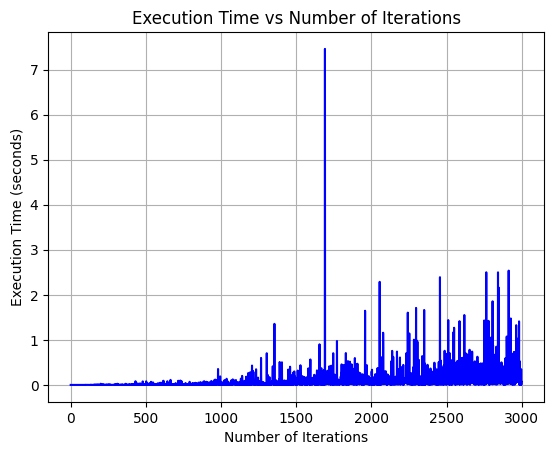

In [176]:
# Plotting the complexity results
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(complexity))], complexity, linestyle='-', color='b',label="values")
plt.xlabel('Number of Iterations')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs Number of Iterations')
plt.grid(True)
plt.show()

In [175]:
np.average(complexity)

0.0814138560295105

In [7]:
import time
import random
complexity_dynamic_programming = []
for i in range(0,3000):
  random_array = [random.randint(5,50) for i in range(i+5)]
  x = random.uniform(0,1)
  if x < 0.5:
    indexes = list(np.unique([random.randint(0,len(random_array)-1)for i in range(random.randint(2,len(random_array)-1))]))
    limit = sum([random_array[index]  for index in indexes ])
  else:
    limit = random.randint(5,50) * len(random_array)
  print(limit,i)
  start_time = time.time()
  result = knapsack_01(random_array,limit)
  end_time = time.time()
  complexity_dynamic_programming.append(end_time-start_time)

170 0
60 1
113 2
144 3
279 4
173 5
253 6
264 7
59 8
189 9
420 10
672 11
748 12
216 13
175 14
120 15
315 16
286 17
212 18
214 19
220 20
448 21
51 22
1232 23
409 24
301 25
775 26
1472 27
307 28
1054 29
463 30
57 31
572 32
154 33
264 34
1880 35
410 36
1764 37
55 38
748 39
463 40
874 41
214 42
405 43
732 44
29 45
663 46
2080 47
424 48
724 49
275 50
1344 51
767 52
1007 53
2419 54
1440 55
2013 56
442 57
1008 58
3072 59
2925 60
1518 61
56 62
466 63
855 64
688 65
1247 66
1296 67
2555 68
2738 69
1207 70
1748 71
218 72
1124 73
3555 74
720 75
1263 76
1035 77
1328 78
635 79
1020 80
951 81
609 82
1303 83
3382 84
1710 85
1820 86
371 87
3255 88
1880 89
665 90
1210 91
1455 92
784 93
229 94
800 95
606 96
192 97
1685 98
2080 99
5040 100
161 101
303 102
1080 103
3597 104
789 105
5550 106
4704 107
1457 108
1888 109
1019 110
3132 111
1429 112
5310 113
1795 114
1950 115
3146 116
416 117
1186 118
6200 119
3625 120
3402 121
1442 122
2037 123
149 124
1370 125
1399 126
2125 127
2128 128
5360 129
1632 130
2421 1

KeyboardInterrupt: 

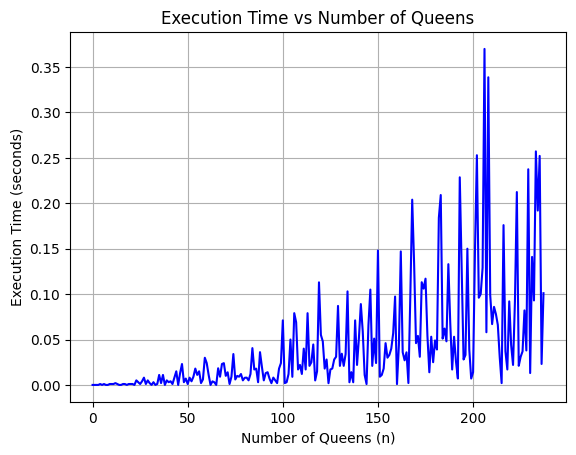

In [8]:
# Plotting the complexity results
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(complexity_dynamic_programming))], complexity_dynamic_programming, linestyle='-', color='b',label="values")
plt.xlabel('Number of Queens (n)')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs Number of Queens')
plt.grid(True)
plt.show()

# Legacy Code

In [203]:
import random
import numpy as np

def knapsack_custom(array, limit):
    sorted_array = sorted(array)

    for i in range(1,len(array)+1):
        min_sum = sum(sorted_array[0:i])
        max_sum = sum(sorted_array[len(array)-i::])
        
        if limit == min_sum or limit == max_sum:
            return True

        if limit > min_sum and limit < max_sum:
            min_index = 0
            max_index = min_index + i
            while limit > min_sum and min_index < len(array)-i:
                min_index += 1
                max_index = min_index + i 
                min_sum = sum(sorted_array[min_index:max_index])

            while limit > max_sum and max_index-min_index > i:
                max_index -= 1 
                min_index = min_index - i 
                max_sum = sum(sorted_array[min_index:max_index])

                if min_index < 0:
                    min_index = 0
                

            result = combinations_of_sums_recursive(sorted_array[min_index:max_index], i, limit)
            if not result:
                continue

            if sum(result) == limit:
                return True

    return False

# Example usage:
array = [2,3,4,10,2,1,20,13]
indexes = list(np.unique([random.randint(0, len(array)-1) for i in range(random.randint(2, len(array)-1))]))
print("Original Array:", array)
limit = sum([array[index] for index in indexes])
print("Selected Indices:", indexes)
print("Limit:", limit)
result = knapsack_custom(array, limit)
print(result)


Original Array: [2, 3, 4, 10, 2, 1, 20, 13]
Selected Indices: [0, 1, 6, 7]
Limit: 38
False


In [525]:
def knapsack_custom_combinatorics(array, limit):
    sorted_array = sorted(array)
    dummy_list = []

    for i in range(sorted_array[0],sorted_array[-1]):
        if i not in sorted_array:
            dummy_list.append(i)

    new_array = [i for i in range(sorted_array[0],sorted_array[-1]+1)]
    print(new_array)
    #print(sorted_array)

    

    
        
    if len(new_array) == 0:
        return False
    elif limit < new_array[0] or limit > (new_array[-1] * (new_array[-1]+1))/2:
        return False
    elif len(new_array) == 1:
        if limit != new_array[0]:
            return False
    else:
        pass

    print(dummy_list)

    if len(dummy_list) > 0:
        for el in dummy_list:
            result = knapsack_01(sorted_array, el)
            print(result)
            if result:
                continue
            else:
                return False
    else:
        return True
# Example usage:
array = [3,1,10,2,100,4,5,20]
indexes = list(np.unique([random.randint(0, len(array)-1) for i in range(random.randint(2, len(array)-1))]))
print("Original Array:", array)
limit = sum([array[index] for index in indexes])
print("Selected Indices:", indexes)
print("Limit:", limit)
result = knapsack_custom(array, limit)
print(result)

Original Array: [3, 1, 10, 2, 100, 4, 5, 20]
Selected Indices: [2, 4, 5, 6]
Limit: 119
False


In [515]:
import random
import numpy as np

random.seed(42)
error_rate = []


for iter in range(5,50):
    result_array = []
    for i in range(5, 100):
        k = iter
        array = [random.randint(1, k) for i in range(int(k))]

        # Scale the array to integers while maintaining proportions
        #avg = np.average(array)
        #u_number = max(array)-min(array)
        #array = [int((i-avg)/u_number*7) for i in array]
        #print(array)
        indexes = list(np.unique([int(random.randint(0, len(array)-1)) for i in range(random.randint(2, len(array)-1))]))
        sum_of_values = sum([array[index] for index in indexes])
        result = knapsack_custom_combinatorics(array, sum_of_values)
        result_array.append(result)

    diff = abs(np.count_nonzero(result_array) - len(result_array))
    print(diff)
    error_rate.append(diff)

print(sum(error_rate)/10)


[]
[2, 3]
[3, 4]
[]
[2]
[2, 3]
[4]
[]
[4]
[]
[]
[]
[]
[]
[]
[4]
[2, 4]
[4]
[3]
[]
[3]
[3, 4]
[4]
[3]
[]
[]
[]
[3]
[]
[]
[2, 4]
[3, 4]
[3, 4]
[4]
[]
[3, 4]
[]
[4]
[4]
[2]
[]
[4]
[2]
[]
[]
[3]
[]
[2]
[2, 4]
[2, 3]
[3]
[2, 4]
[]
[2]
[]
[2, 4]
[]
[3]
[3]
[3]
[]
[]
[3]
[]
[2, 3]
[]
[2]
[3]
[]
[]
[4]
[3, 4]
[]
[2]
[4]
[2, 4]
[]
[]
[3]
[]
[4]
[3]
[]
[]
[]
[]
[]
[]
[2, 3]
[4]
[3]
[]
54
[4, 5]
[3, 5]
[5]
[3]
[]
[]
[2, 4]
[4]
[2, 3]
[5]
[]
[4]
[3, 5]
[]
[3]
[2, 4]
[]
[3]
[3, 5]
[2]
[2, 3]
[5]
[5]
[]
[3]
[2, 5]
[]
[]
[2]
[]
[3, 4, 5]
[4]
[4]
[5]
[2]
[]
[4]
[5]
[3]
[3]
[5]
[2]
[3, 4]
[3, 4]
[4]
[4]
[3]
[2]
[2]
[2, 3, 5]
[4]
[2, 3]
[3]
[2, 5]
[2, 3, 5]
[2]
[2, 4]
[4]
[2, 3, 4]
[3]
[4]
[2, 5]
[2, 5]
[]
[2, 5]
[4]
[2]
[]
[3]
[3, 4]
[4, 5]
[3, 5]
[5]
[2]
[2, 3]
[]
[4]
[3]
[2, 4]
[5]
[]
[2]
[]
[2, 4]
[3, 4]
[]
[]
[4]
[]
77
[4, 5]
[5]
[4]
[3]
[3, 4]
[]
[2, 3, 4, 6]
[2, 5]
[4, 5]
[4]
[5]
[2, 6]
[2, 4, 5]
[5]
[2, 5]
[2]
[2]
[]
[3]
[]
[]
[]
[5]
[2, 5]
[4, 5]
[3, 4, 5, 6]
[3, 6]
[2, 3, 6]
[]
[3, 4, 6]
[4, 6